<a href="https://colab.research.google.com/github/epigos/house-prices-prediction/blob/main/house_prices_data_prep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install -q -U googlemaps

In [14]:
# some builtin imports
import re
import warnings
from collections import Counter
import time
from datetime import datetime
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
from pathlib import Path

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# import stats modules
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

# sklearn models
from sklearn.preprocessing import StandardScaler

In [55]:
df = pd.read_json("house_listings.json")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33659 entries, 0 to 33658
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source          33659 non-null  object        
 1   url             33659 non-null  object        
 2   listing_type    33659 non-null  object        
 3   crawled_date    33659 non-null  object        
 4   timestamp       33659 non-null  datetime64[ns]
 5   name            33659 non-null  object        
 6   price           33659 non-null  int64         
 7   currency        33659 non-null  object        
 8   location        33659 non-null  object        
 9   category        33609 non-null  object        
 10  bedrooms        33612 non-null  float64       
 11  bathrooms       33612 non-null  float64       
 12  toilets         17069 non-null  float64       
 13  parking_space   33659 non-null  bool          
 14  address         33556 non-null  object        
 15  es

In [57]:
df.head()

,source,url,listing_type,crawled_date,timestamp,name,price,currency,location,category,...,floor_area,agent,image_urls,amenities,pets,agency_fee,caution_fee,service_charge,agent_fee,legal_fee
0,tonaton.com,https://tonaton.com/a-MfYFNdCgE7EwZFLq3ewrBkKd...,rentals,2024/11/15,2024-11-15 21:28:58.400,"2bdrm Apartment in Tech Apemso Knust, Kumasi M...",1500,GH₵,"Ashanti, Kumasi Metropolitan",Apartment,...,158 sqm,Harvard Estate Ltd.,[https://tonaton.com/r/cGljdHVyZXMtZ2hhbmEuaml...,None,None,NaN,NaN,NaN,NaN,NaN
1,tonaton.com,https://tonaton.com/a-MfYFNdCgCTytOcmvZIh0Kzrj...,rentals,2024/11/15,2024-11-15 21:28:58.671,"2bdrm Apartment in Charclem Ventures, East Leg...",9196,GH₵,"Greater Accra, East Legon",Apartment,...,145 sqm,Charclem Ventures,[https://tonaton.com/r/cGljdHVyZXMtZ2hhbmEuaml...,"[24-hour Electricity, Air Conditioning, Balcon...",None,NaN,NaN,NaN,NaN,NaN
2,tonaton.com,https://tonaton.com/a-MfYFNdCgwtb8Itol9odpMPvC...,rentals,2024/11/15,2024-11-15 21:28:58.985,"2bdrm Apartment in , Dzorwulu for rent",7500,GH₵,"Greater Accra, Dzorwulu",Apartment,...,100 sqm,Unique Key Agency,[https://tonaton.com/r/cGljdHVyZXMtZ2hhbmEuaml...,"[24-hour Electricity, Air Conditioning, Apartm...",None,NaN,NaN,NaN,NaN,NaN
3,tonaton.com,https://tonaton.com/a-MfYFNdCgPjnzPYwNFEv5JrGy...,rentals,2024/11/15,2024-11-15 21:28:59.285,"4bdrm House in Lakeside Estate, for Rent",11200,GH₵,"Greater Accra, Ashaley Botwe, Lake Side Estate",House,...,100 sqm,MafLuck Realty,[https://tonaton.com/r/cGljdHVyZXMtZ2hhbmEuaml...,"[Tiled Floor, Chandelier, Dining Area, Balcony...",Pets Allowed,NaN,NaN,NaN,NaN,NaN
4,tonaton.com,https://tonaton.com/a-MfYFNdCgpsuL2ZA4TizCMNWs...,rentals,2024/11/15,2024-11-15 21:28:59.480,"2bdrm Apartment in Zoomlion, School Junction f...",3000,GH₵,"Greater Accra, Ashaley Botwe, Ashaley Botwe Sc...",Apartment,...,100 sqm,Domla Group,[https://tonaton.com/r/cGljdHVyZXMtZ2hhbmEuaml...,None,None,NaN,NaN,NaN,NaN,NaN


# Data cleaning

## Property Categories

In [58]:
df.category.value_counts()

,count
category,
House,15053
Apartment,13621
Duplex,2105
Mansion,764
Townhouse / Terrace,491
Room & Parlour,322
Bungalow,271
Townhouse/Terrace,265
Block of Flats,237


In [59]:
df.category.unique().tolist()

['Apartment',
 'House',
 'Room & Parlour',
 'Townhouse / Terrace',
 'Mini Flat',
 'Duplex',
 'Mansion',
 'Block of Flats',
 'Studio Apartment',
 'Penthouse',
 'Bungalow',
 'Townhouse',
 'Bedsitter',
 'Townhouse/Terrace',
 'Shared Apartment',
 'Villa',
 'Maisonette',
 'Farm House',
 'Flat',
 'Condo',
 None,
 'Chalet']

In [60]:
# regroup the categories
df['category'] = df['category'].map({
    'Apartment': 'Flats',
    'House': 'Detached',
    'Townhouse / Terrace': 'Townhouse',
    'Mini Flat': 'Flats',
    'Penthouse': 'Detached',
    'Duplex': 'Duplex',
    'Room & Parlour': 'Flats',
    'Mansion': 'Mansion',
    'Studio Apartment': 'Flats',
    'Bungalow': 'Detached',
    'Block of Flats': 'Semi-Detached',
    'Villa': 'Detached',
    'Shared Apartment': 'Flats',
    'Maisonette': 'Flats',
    'Townhouse/Terrace': 'Townhouse',
    'Bedsitter': 'Flats',
    'Farm House': 'Detached',
    'Chalet': 'Detached',
    'Townhouse': 'Semi-Detached',
    'Condo': 'Flats',
    'Flat': 'Flats'
})

In [61]:
df['category'].value_counts()

,count
category,
Detached,15413
Flats,14314
Duplex,2105
Mansion,764
Townhouse,756
Semi-Detached,257


## Property condition

Refine property conditions and merge duplicates

In [62]:
df.condition.value_counts()

,count
condition,
Newly-Built,19322
Fairly Used,11931
Uncompleted Building,936
Renovated,677
Old,353
Under construction,69
Off-Plan,21


In [63]:
df['condition'] = df['condition'].map({
    'Newly-Built': 'New',
    'Fairly Used': 'Used',
    'Uncompleted Building': 'Off-Plan',
    'Renovated': 'Renovated',
    'Old': 'Used',
    'Under construction': 'Off-Plan',
    'Off-Plan':'Off-Plan',
    'New': 'New'
})

In [64]:
df.condition.value_counts()

,count
condition,
New,19322
Used,12284
Off-Plan,1026
Renovated,677


## Floor area

Strip unit and convert floor area to floats

In [65]:
df.floor_area.head()

,floor_area
0,158 sqm
1,145 sqm
2,100 sqm
3,100 sqm
4,100 sqm


In [66]:
import re

def parse_floor_area(x):
    if not x:
        return np.nan
    area = re.findall(r"\d+", str(x))
    return int(area[0]) if area else np.nan

df['floor_area'] = df['floor_area'].apply(parse_floor_area)

## Location



In [67]:
df['location'].nunique()

345

In [68]:
df['location'].unique()

array(['Ashanti, Kumasi Metropolitan', 'Greater Accra, East Legon',
       'Greater Accra, Dzorwulu',
       'Greater Accra, Ashaley Botwe, Lake Side Estate',
       'Greater Accra, Ashaley Botwe, Ashaley Botwe School Junction',
       'Greater Accra, Teshie', 'Greater Accra, Spintex',
       'Greater Accra, Agbogba', 'Greater Accra, Adenta',
       'Greater Accra, Oyarifa', 'Greater Accra, Cantonments',
       'Greater Accra, Adjiriganor', 'Greater Accra, Haatso, ECOMOG',
       'Greater Accra, Ashaiman Municipal',
       'Greater Accra, Accra Metropolitan',
       'Greater Accra, Oyarifa, Owusu Ansah',
       'Greater Accra, Nungua, Addogonno',
       'Greater Accra, Teshie, Tseaddo',
       'Greater Accra, Ablekuma, Manhean',
       'Greater Accra, East Legon, East Legon Police Station',
       'Greater Accra, Weija, Bortiano', 'Greater Accra, Dome',
       'Greater Accra, Spintex, Baatsona Total',
       'Greater Accra, Burma Camp', 'Greater Accra, Adjiriganor, Ability',
       'Gr

In [69]:
# extract region names from location
df['region'] = df['location'].map(lambda x: x.split(',')[0].strip())

In [70]:
df['region'].value_counts()

,count
region,
Greater Accra,29918
Ashanti,2731
Central Region,419
Northern Region,267
Eastern Region,133
Western Region,112
Brong Ahafo,70
Volta Region,9


In [71]:
# extract locality from location

import re


def parse_locality(x):
    if not x:
        return np.nan

    parts = re.split(r'[,/]', x)
    parts = [part.strip() for part in parts]

    if len(parts) > 1:
        return parts[1]
    else:
        return np.nan


df['locality'] = df['location'].map(parse_locality)
df['locality'].value_counts()

,count
locality,
East Legon,5040
Spintex,3187
Kumasi Metropolitan,2500
Ashaley Botwe,2182
Accra Metropolitan,2172
...,...
Abossey Okai,1
Ekumfi,1
Mfantsiman Municipal,1


In [72]:
df['locality'].unique()

array(['Kumasi Metropolitan', 'East Legon', 'Dzorwulu', 'Ashaley Botwe',
       'Teshie', 'Spintex', 'Agbogba', 'Adenta', 'Oyarifa', 'Cantonments',
       'Adjiriganor', 'Haatso', 'Ashaiman Municipal',
       'Accra Metropolitan', 'Nungua', 'Ablekuma', 'Weija', 'Dome',
       'Burma Camp', 'Ashomang Estate', 'Ga West Municipal',
       'Taifa-Burkina', 'Osu', 'Tema Metropolitan',
       'Airport Residential Area', 'Kaneshie', 'Ga South Municipal',
       'Labone', 'West Legon', 'Roman Ridge', 'Madina', 'Tesano', 'Kasoa',
       'North Legon', 'New-Juaben Municipal', 'Dansoman', 'Abokobi',
       'Tantra Hills', 'Ofankor', 'Old Ashomang', 'Kotobabi', 'Achimota',
       'Ga East Municipal', 'Awutu Senya East Municipal', 'Odorkor',
       'Darkuman', 'Pokuase', 'Lapaz', 'Ledzokuku-Krowor', 'Kokomlemle',
       'Santa Maria', 'Ridge', 'Dworwulu', 'Atwima Nwabiagya',
       'Tamale Municipal', 'Oyibi', 'Kwashieman', 'Takoradi',
       'Awutu Senya West', 'Labadi', 'Sunyani West', 'Sowutwuom

## Amenities

Convert list to strings

In [73]:
df['amenities'].head(10)

,amenities
0,None
1,"[24-hour Electricity, Air Conditioning, Balcon..."
2,"[24-hour Electricity, Air Conditioning, Apartm..."
3,"[Tiled Floor, Chandelier, Dining Area, Balcony..."
4,None
5,None
6,"[Pop Ceiling, Pre-Paid Meter, 24-hour Electric..."
7,"[Pre-Paid Meter, Dining Area, Chandelier, Balc..."
8,"[24-hour Electricity, Air Conditioning, Apartm..."
9,"[24-hour Electricity, Apartment, Balcony, Kitc..."


In [74]:
df['amenities'] = df['amenities'].map(lambda x: ",".join(x) if isinstance(x, list) else x)

In [76]:
df['amenities'].head()

,amenities
0,None
1,"24-hour Electricity,Air Conditioning,Balcony,C..."
2,"24-hour Electricity,Air Conditioning,Apartment..."
3,"Tiled Floor,Chandelier,Dining Area,Balcony,Pop..."
4,None


## Parking space

In [77]:
df.parking_space.value_counts()

,count
parking_space,
False,26736
True,6923


## Furnished state

In [78]:
df.is_furnished.value_counts()

,count
is_furnished,
Unfurnished,20834
Semi-Furnished,8915
Furnished,3863


## Drop null and duplicates

In [79]:
df.columns.tolist()

['source',
 'url',
 'listing_type',
 'crawled_date',
 'timestamp',
 'name',
 'price',
 'currency',
 'location',
 'category',
 'bedrooms',
 'bathrooms',
 'toilets',
 'parking_space',
 'address',
 'estate_name',
 'condition',
 'is_furnished',
 'floor_area',
 'agent',
 'image_urls',
 'amenities',
 'pets',
 'agency_fee',
 'caution_fee',
 'service_charge',
 'agent_fee',
 'legal_fee',
 'region',
 'locality']

In [80]:
required_cols = [
    'url',
    'listing_type',
    'name',
    'price',
    'category',
    'bedrooms',
    'bathrooms',
    'floor_area',
    'location',
    'condition',
    'amenities',
]
selected_cols = [
    'region',
    'locality',
    'parking_space',
    'is_furnished',
]

In [81]:
df = df.dropna(subset=required_cols)
df = df.drop_duplicates(subset=['url'])

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 1 to 33658
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   source          28154 non-null  object        
 1   url             28154 non-null  object        
 2   listing_type    28154 non-null  object        
 3   crawled_date    28154 non-null  object        
 4   timestamp       28154 non-null  datetime64[ns]
 5   name            28154 non-null  object        
 6   price           28154 non-null  int64         
 7   currency        28154 non-null  object        
 8   location        28154 non-null  object        
 9   category        28154 non-null  object        
 10  bedrooms        28154 non-null  float64       
 11  bathrooms       28154 non-null  float64       
 12  toilets         14689 non-null  float64       
 13  parking_space   28154 non-null  bool          
 14  address         28138 non-null  object        
 15  estate_

In [83]:
df = df[required_cols + selected_cols]

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 1 to 33658
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            28154 non-null  object 
 1   listing_type   28154 non-null  object 
 2   name           28154 non-null  object 
 3   price          28154 non-null  int64  
 4   category       28154 non-null  object 
 5   bedrooms       28154 non-null  float64
 6   bathrooms      28154 non-null  float64
 7   floor_area     28154 non-null  float64
 8   location       28154 non-null  object 
 9   condition      28154 non-null  object 
 10  amenities      28154 non-null  object 
 11  region         28154 non-null  object 
 12  locality       28152 non-null  object 
 13  parking_space  28154 non-null  bool   
 14  is_furnished   28154 non-null  object 
dtypes: bool(1), float64(3), int64(1), object(10)
memory usage: 3.2+ MB


## Geocoding

In [85]:
!cp /content/drive/My\ Drive/Datasets/geo_codes_cache.json .

In [86]:
import googlemaps
from datetime import datetime
from google.colab import userdata

gmaps = googlemaps.Client(key=userdata.get('GOOGLE_MAPS_KEY'))

In [87]:
with open("geo_codes_cache.json", "r") as f:
    geo_codes_cache = json.load(f)

In [88]:
from pprint import pprint
geocode_result = geo_codes_cache['greater accra, awoshie, awoshie last stop']

In [89]:
geocode_result[0]['geometry']['location']

{'lat': 5.591910599999999, 'lng': -0.2876696}

In [91]:
# create new columns lat and lng based on the geocode_result using the location column to get the results
def get_lat_lng(location):
    """Retrieves latitude and longitude from a location string using Google Maps Geocoding API."""
    geocode_result = []
    lower_location = location.lower()
    if lower_location in geo_codes_cache:
        geocode_result = geo_codes_cache[lower_location]
    else:
        try:
            geocode_result = gmaps.geocode(location, region="gh")
        except Exception as e:
            print(f"Error geocoding {location}: {e}")

    if not geocode_result:
        return (None, None)


    lat = geocode_result[0]['geometry']['location']['lat']
    lng = geocode_result[0]['geometry']['location']['lng']

    geo_codes_cache[lower_location] = geocode_result

    return (lat, lng)

In [92]:
get_lat_lng('Greater Accra, Awoshie, Awoshie Last Stop')

(5.591910599999999, -0.2876696)

In [93]:
# Apply the function to the 'location' column to get latitude and longitude
df[['lat', 'lng']] = df['location'].apply(lambda x: pd.Series(get_lat_lng(x)))

In [94]:
import json
with open("geo_codes_cache.json", "w") as f:
    json.dump(geo_codes_cache, f)

In [95]:
len(geo_codes_cache)

344

In [96]:
!cp geo_codes_cache.json /content/drive/My\ Drive/Datasets/

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28154 entries, 1 to 33658
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            28154 non-null  object 
 1   listing_type   28154 non-null  object 
 2   name           28154 non-null  object 
 3   price          28154 non-null  int64  
 4   category       28154 non-null  object 
 5   bedrooms       28154 non-null  float64
 6   bathrooms      28154 non-null  float64
 7   floor_area     28154 non-null  float64
 8   location       28154 non-null  object 
 9   condition      28154 non-null  object 
 10  amenities      28154 non-null  object 
 11  region         28154 non-null  object 
 12  locality       28152 non-null  object 
 13  parking_space  28154 non-null  bool   
 14  is_furnished   28154 non-null  object 
 15  lat            28154 non-null  float64
 16  lng            28154 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(10)
memory usa

## Remove outliers

In [98]:
## Customize Matplotlib Parameters
%matplotlib inline
mpl.rcParams['figure.dpi']= 150
mpl.rcParams['figure.edgecolor']= 'black'
mpl.rcParams['axes.linewidth']= .5
# Customize Seaborn Parameters
sns.set()
rc = {
      'font.family': ['serif'],
      'font.serif':'Times New Roman',
      'grid.color': 'gainsboro',
      'grid.linestyle': '-',
}
sns.set_style(rc=rc)
sns.set_context("notebook", font_scale=0.8)

In [99]:
def plot_price(df, cutoff=5000, l1=12, l2=17):
    plt.figure(num=1, figsize=(20,10), linewidth=1)
    # plot distribution of price
    plt.subplot2grid((2, 3), (0, 0))
    sns.distplot(df['price'])
    # plot distribution of log(1+price)
    plt.subplot2grid((2, 3), (0, 1))
    sns.distplot(np.log1p(df['price']))
    plt.axvline(x=l1, color='b', linestyle=':')
    plt.axvline(x=l2, color='b', linestyle=':')
    plt.xlabel('log(1+price)')
    ## plot qqplot of distribution of log(1+price)
    ax = plt.subplot2grid((2, 3), (0, 2))
    sm.qqplot(np.log1p(df['price']), stats.norm, fit=True, line='45', ax=ax);

    # boxplot of price column
    plt.subplot2grid((2, 3), (1, 0), colspan=3)
    red = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
    df.price.plot(kind='box', xlim=(0, cutoff), vert=False, flierprops=red)

    plt.tight_layout()

In [100]:
df['listing_type'].value_counts()

,count
listing_type,
rentals,18525
sale,9629


In [101]:
rental_df = df[df['listing_type'] == 'rentals'].reset_index(drop=True)
sale_df = df[df['listing_type'] == 'sale'].reset_index(drop=True)

## Rentals

In [102]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18525 entries, 0 to 18524
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            18525 non-null  object 
 1   listing_type   18525 non-null  object 
 2   name           18525 non-null  object 
 3   price          18525 non-null  int64  
 4   category       18525 non-null  object 
 5   bedrooms       18525 non-null  float64
 6   bathrooms      18525 non-null  float64
 7   floor_area     18525 non-null  float64
 8   location       18525 non-null  object 
 9   condition      18525 non-null  object 
 10  amenities      18525 non-null  object 
 11  region         18525 non-null  object 
 12  locality       18525 non-null  object 
 13  parking_space  18525 non-null  bool   
 14  is_furnished   18525 non-null  object 
 15  lat            18525 non-null  float64
 16  lng            18525 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(10)
memor

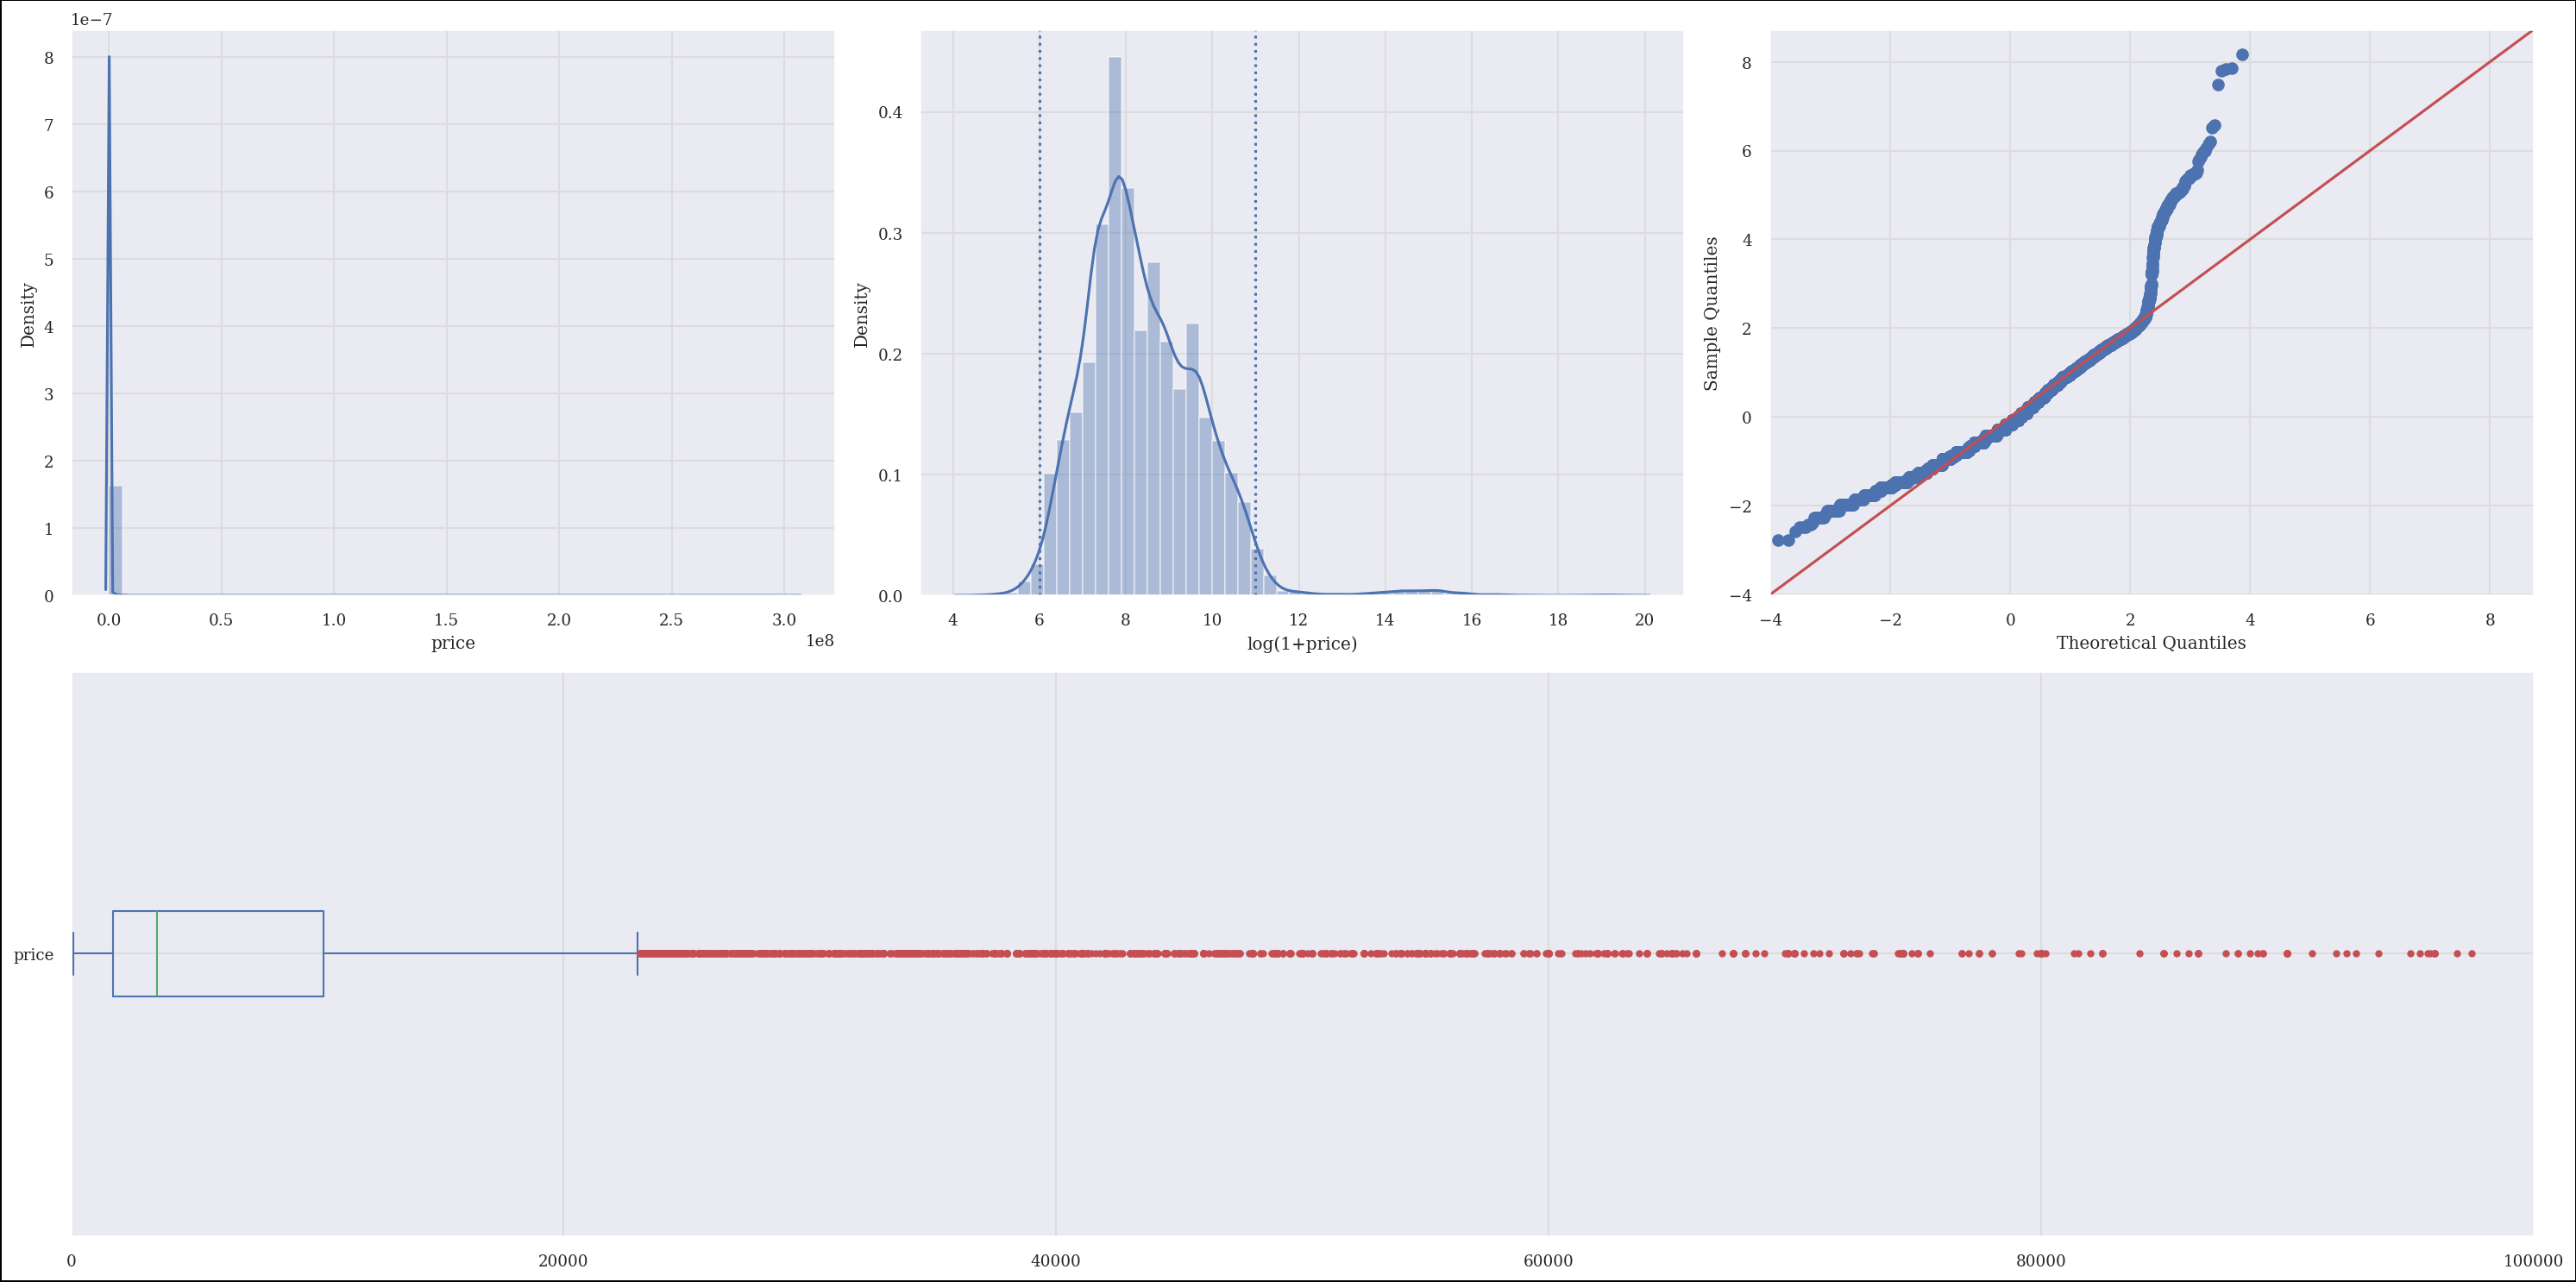

In [103]:
l1 = 6
l2 = 11
plot_price(rental_df, cutoff=100_000, l1=l1, l2=l2)

In [104]:
# inverse of log transformed prices
outliers = rental_df[(np.log1p(rental_df['price']) < l1) | (np.log1p(rental_df['price']) > l2)]
print(f'Number of listings which are assumed as outliers: {len(outliers)}\n')
print(f'Outlier range: prices below {np.exp(l1) - 1} and above {np.exp(l2) - 1}')

Number of listings which are assumed as outliers: 635

Outlier range: prices below 402.4287934927351 and above 59873.14171519782


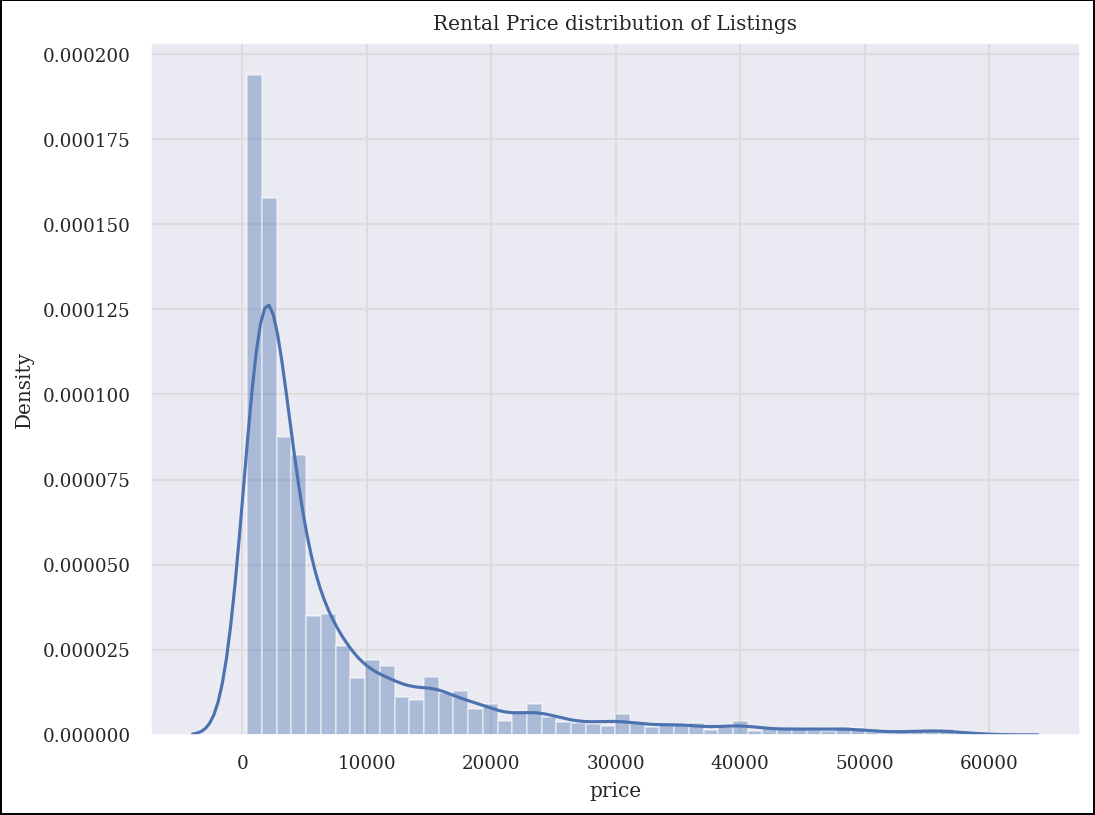

In [105]:
# plot price distribution of prices after removing outliers
plt.figure(num=1, figsize=(8,6), linewidth=1)
rental_df = rental_df.drop(index=outliers.index)
sns.distplot(rental_df.price)

_= plt.title('Rental Price distribution of Listings')

In [106]:
rental_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17890 entries, 0 to 18524
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            17890 non-null  object 
 1   listing_type   17890 non-null  object 
 2   name           17890 non-null  object 
 3   price          17890 non-null  int64  
 4   category       17890 non-null  object 
 5   bedrooms       17890 non-null  float64
 6   bathrooms      17890 non-null  float64
 7   floor_area     17890 non-null  float64
 8   location       17890 non-null  object 
 9   condition      17890 non-null  object 
 10  amenities      17890 non-null  object 
 11  region         17890 non-null  object 
 12  locality       17890 non-null  object 
 13  parking_space  17890 non-null  bool   
 14  is_furnished   17890 non-null  object 
 15  lat            17890 non-null  float64
 16  lng            17890 non-null  float64
dtypes: bool(1), float64(5), int64(1), object(10)
memory usa

In [107]:
rental_df.to_csv("house_rentals.csv", index=False)

In [108]:
!cp house_rentals.csv /content/drive/My\ Drive/Datasets/

## Sale

In [109]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9629 entries, 0 to 9628
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            9629 non-null   object 
 1   listing_type   9629 non-null   object 
 2   name           9629 non-null   object 
 3   price          9629 non-null   int64  
 4   category       9629 non-null   object 
 5   bedrooms       9629 non-null   float64
 6   bathrooms      9629 non-null   float64
 7   floor_area     9629 non-null   float64
 8   location       9629 non-null   object 
 9   condition      9629 non-null   object 
 10  amenities      9629 non-null   object 
 11  region         9629 non-null   object 
 12  locality       9627 non-null   object 
 13  parking_space  9629 non-null   bool   
 14  is_furnished   9629 non-null   object 
 15  lat            9629 non-null   float64
 16  lng            9629 non-null   float64
dtypes: bool(1), float64(5), int64(1), object(10)
memory 

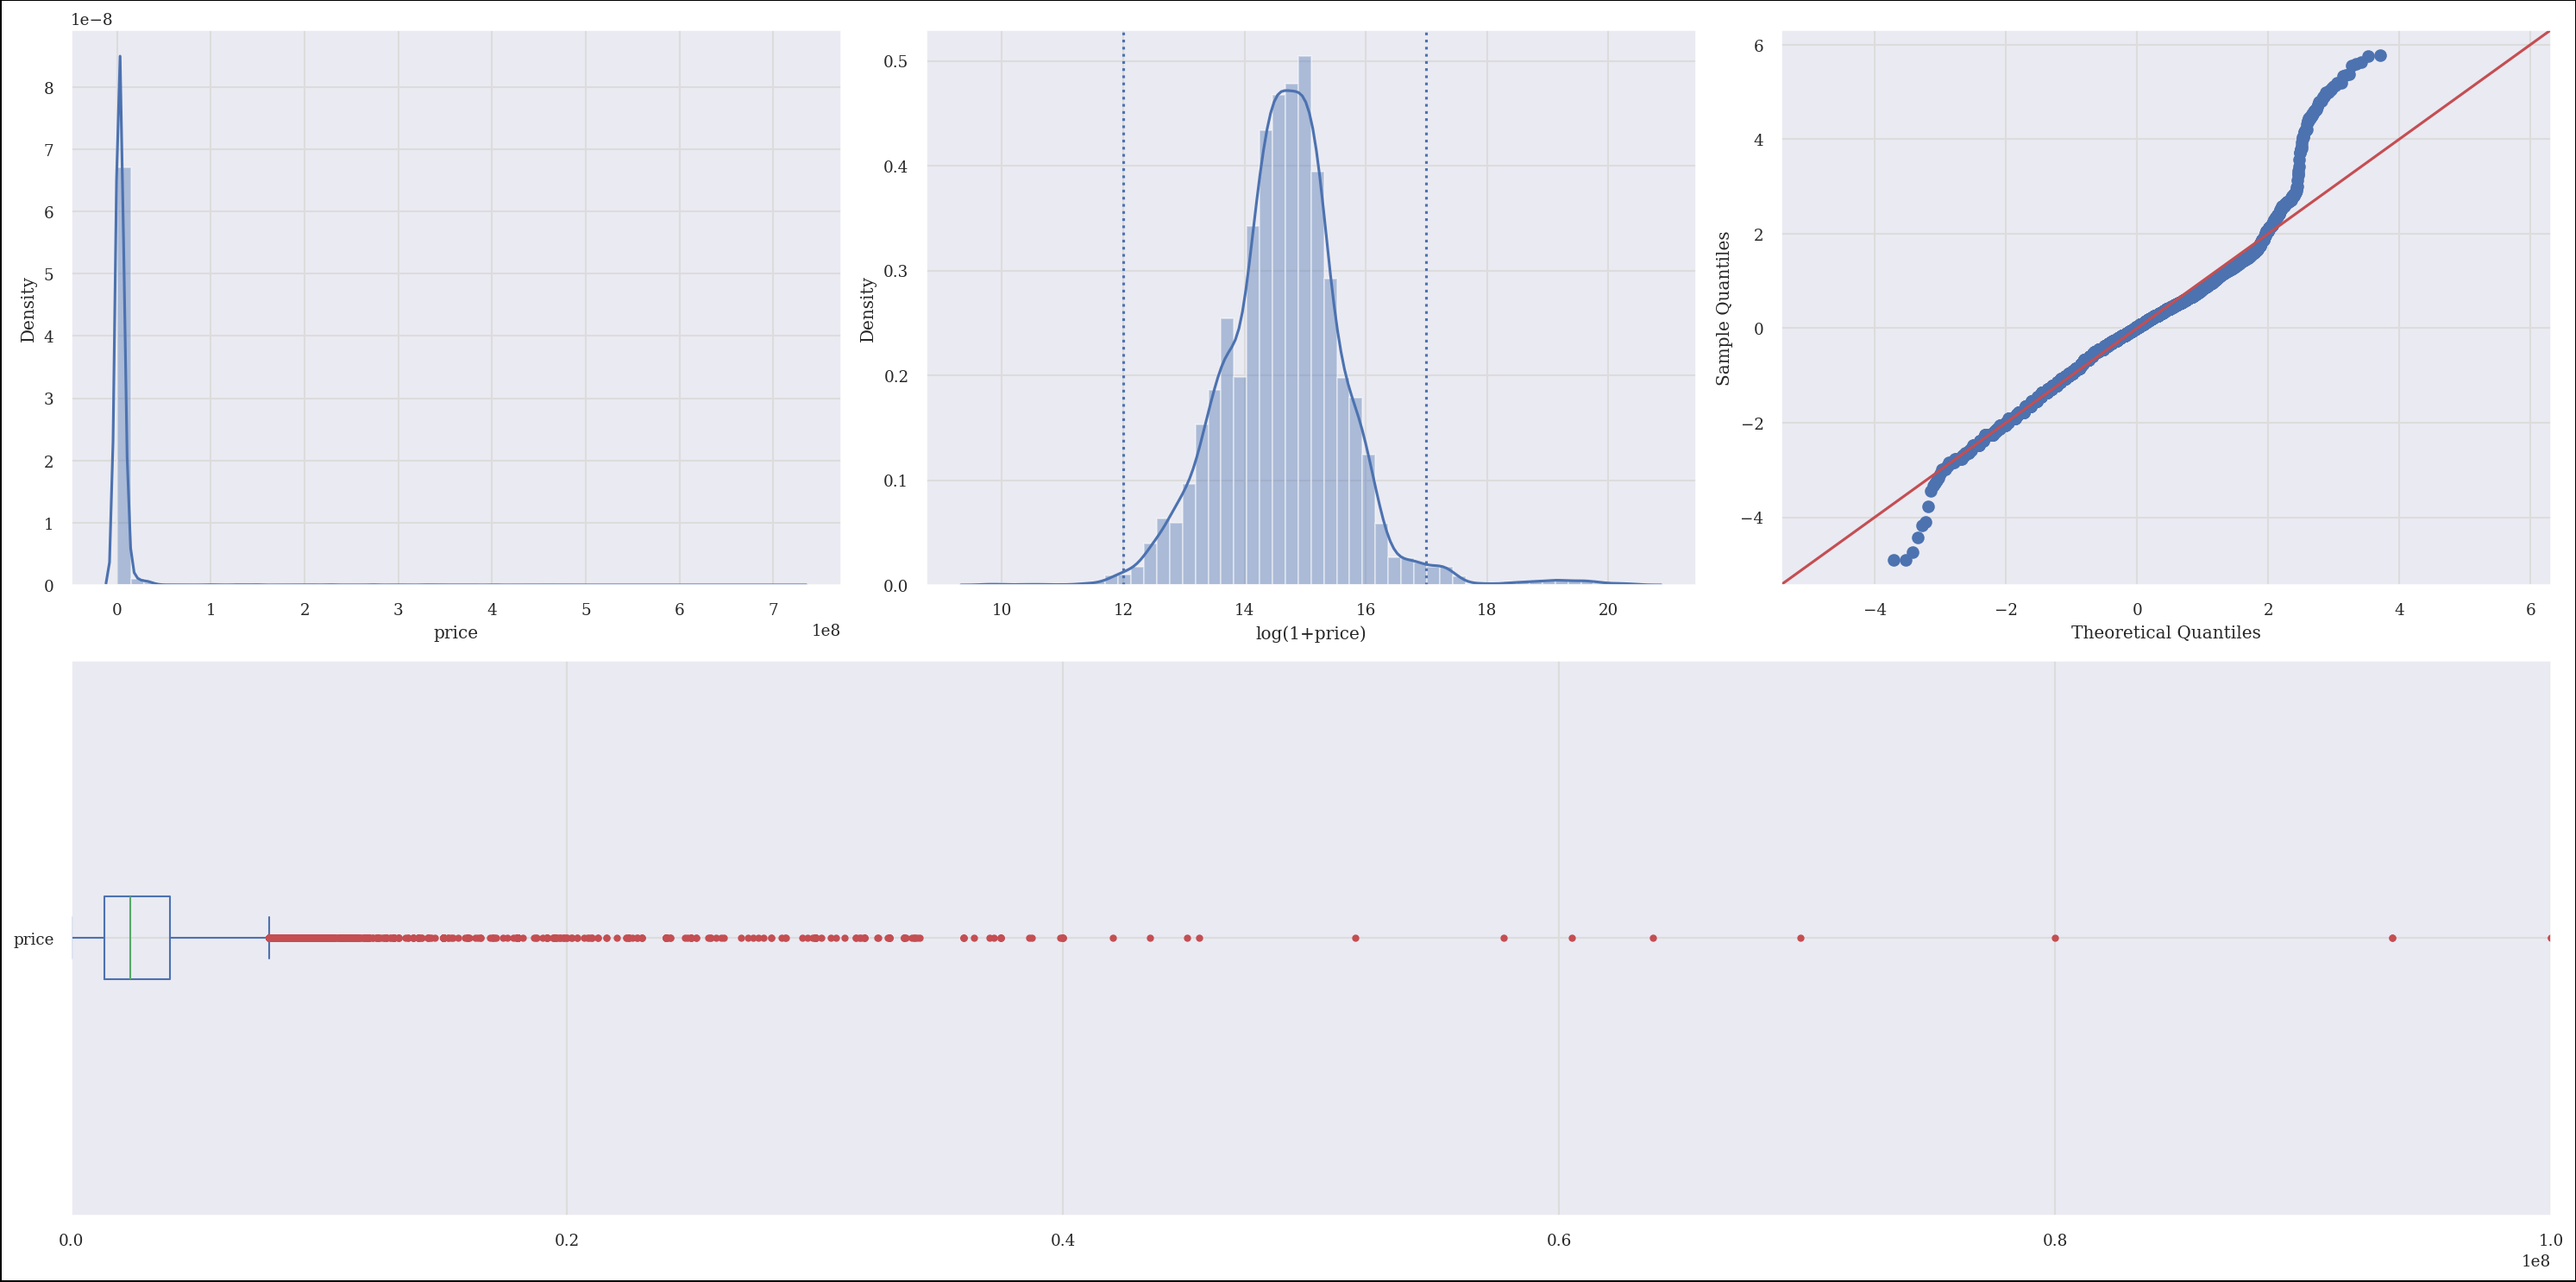

In [111]:
l1 = 12
l2 = 17
plot_price(sale_df, cutoff=100_000_000, l1=l1, l2=l2)

In [112]:
# inverse of log transformed prices
outliers = sale_df[(np.log1p(sale_df['price']) < l1) | (np.log1p(sale_df['price']) > l2)]
print(f'Number of listings which are assumed as outliers: {len(outliers)}\n')
print(f'Outlier range: prices below {np.exp(l1) - 1} and above {np.exp(l2) - 1}')

Number of listings which are assumed as outliers: 199

Outlier range: prices below 162753.79141900392 and above 24154951.7535753


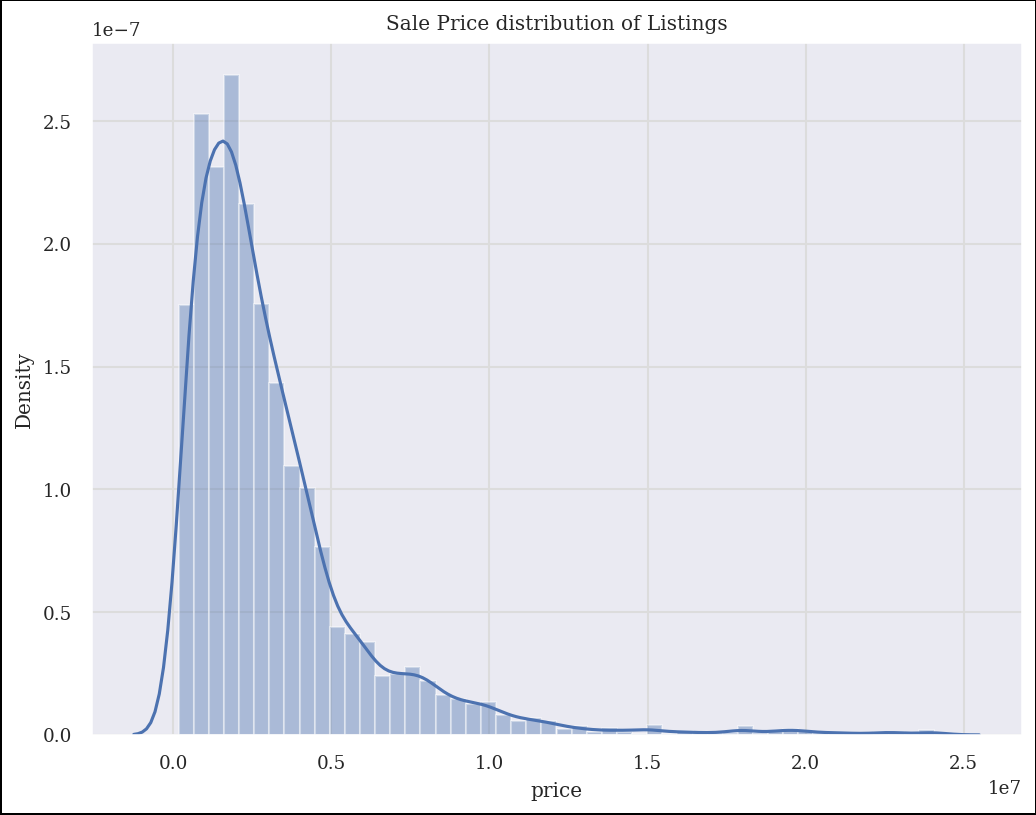

In [113]:
# plot price distribution of prices after removing outliers
plt.figure(num=1, figsize=(8,6), linewidth=1)

sale_df = sale_df.drop(index=outliers.index)
sns.distplot(sale_df.price)

_= plt.title('Sale Price distribution of Listings')

In [114]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9430 entries, 0 to 9628
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   url            9430 non-null   object 
 1   listing_type   9430 non-null   object 
 2   name           9430 non-null   object 
 3   price          9430 non-null   int64  
 4   category       9430 non-null   object 
 5   bedrooms       9430 non-null   float64
 6   bathrooms      9430 non-null   float64
 7   floor_area     9430 non-null   float64
 8   location       9430 non-null   object 
 9   condition      9430 non-null   object 
 10  amenities      9430 non-null   object 
 11  region         9430 non-null   object 
 12  locality       9428 non-null   object 
 13  parking_space  9430 non-null   bool   
 14  is_furnished   9430 non-null   object 
 15  lat            9430 non-null   float64
 16  lng            9430 non-null   float64
dtypes: bool(1), float64(5), int64(1), object(10)
memory usage

In [115]:
sale_df.to_csv("house_sale.csv", index=False)

In [116]:
!cp house_sale.csv /content/drive/My\ Drive/Datasets/